In [1]:
import pickle
import os
from distance_table import DistanceTable
import random
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
# Lo primero es cargar cargar el archivo que contiene los nodos y sus posiciones.

file_path = '../data/input/eil101.tsp' # Change this
fileName = "eil101" # Change this
clean_lines = []
try:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            clean_lines.append(line.strip())
            print(line.strip()) # .strip() removes leading/trailing whitespace, including newline characters
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

NAME : eil101
COMMENT : 101-city problem (Christofides/Eilon)
TYPE : TSP
DIMENSION : 101
EDGE_WEIGHT_TYPE : EUC_2D
NODE_COORD_SECTION
1 41 49
2 35 17
3 55 45
4 55 20
5 15 30
6 25 30
7 20 50
8 10 43
9 55 60
10 30 60
11 20 65
12 50 35
13 30 25
14 15 10
15 30 5
16 10 20
17 5 30
18 20 40
19 15 60
20 45 65
21 45 20
22 45 10
23 55 5
24 65 35
25 65 20
26 45 30
27 35 40
28 41 37
29 64 42
30 40 60
31 31 52
32 35 69
33 53 52
34 65 55
35 63 65
36 2 60
37 20 20
38 5 5
39 60 12
40 40 25
41 42 7
42 24 12
43 23 3
44 11 14
45 6 38
46 2 48
47 8 56
48 13 52
49 6 68
50 47 47
51 49 58
52 27 43
53 37 31
54 57 29
55 63 23
56 53 12
57 32 12
58 36 26
59 21 24
60 17 34
61 12 24
62 24 58
63 27 69
64 15 77
65 62 77
66 49 73
67 67 5
68 56 39
69 37 47
70 37 56
71 57 68
72 47 16
73 44 17
74 46 13
75 49 11
76 49 42
77 53 43
78 61 52
79 57 48
80 56 37
81 55 54
82 15 47
83 14 37
84 11 31
85 16 22
86 4 18
87 28 18
88 26 52
89 26 35
90 31 67
91 15 19
92 22 22
93 18 24
94 26 27
95 25 24
96 22 27
97 25 21
98 19 21
99 20 2

In [3]:
nodes = clean_lines[6:]
nodes = nodes[:-1]  # Remove the last line which is 'EOF'
print(nodes)

['1 41 49', '2 35 17', '3 55 45', '4 55 20', '5 15 30', '6 25 30', '7 20 50', '8 10 43', '9 55 60', '10 30 60', '11 20 65', '12 50 35', '13 30 25', '14 15 10', '15 30 5', '16 10 20', '17 5 30', '18 20 40', '19 15 60', '20 45 65', '21 45 20', '22 45 10', '23 55 5', '24 65 35', '25 65 20', '26 45 30', '27 35 40', '28 41 37', '29 64 42', '30 40 60', '31 31 52', '32 35 69', '33 53 52', '34 65 55', '35 63 65', '36 2 60', '37 20 20', '38 5 5', '39 60 12', '40 40 25', '41 42 7', '42 24 12', '43 23 3', '44 11 14', '45 6 38', '46 2 48', '47 8 56', '48 13 52', '49 6 68', '50 47 47', '51 49 58', '52 27 43', '53 37 31', '54 57 29', '55 63 23', '56 53 12', '57 32 12', '58 36 26', '59 21 24', '60 17 34', '61 12 24', '62 24 58', '63 27 69', '64 15 77', '65 62 77', '66 49 73', '67 67 5', '68 56 39', '69 37 47', '70 37 56', '71 57 68', '72 47 16', '73 44 17', '74 46 13', '75 49 11', '76 49 42', '77 53 43', '78 61 52', '79 57 48', '80 56 37', '81 55 54', '82 15 47', '83 14 37', '84 11 31', '85 16 22', '

In [4]:
def load_or_create_distance_table(nodes, cache_file=f'data/output/tables/distance_table_{fileName}.pkl'):
    os.makedirs(os.path.dirname(cache_file), exist_ok=True)
    if os.path.exists(cache_file):
        print(f"Cargando matriz de distancias desde {cache_file}")
        with open(cache_file, 'rb') as f:
            return pickle.load(f)
    else:
        print("Calculando matriz de distancias")
        distance_table = DistanceTable(nodes)
        print(f"Guardando matriz en {cache_file} para uso futuro")
        with open(cache_file, 'wb') as f:
            pickle.dump(distance_table, f)
        return distance_table

In [5]:
distance_table = load_or_create_distance_table(nodes)

nodes = distance_table.nodes

print("Cantidad de nodos: ", len(nodes))
for node in nodes:
    print(node)

Cargando matriz de distancias desde data/output/tables/distance_table_eil101.pkl
Cantidad de nodos:  101
(1, 41.0, 49.0)
(2, 35.0, 17.0)
(3, 55.0, 45.0)
(4, 55.0, 20.0)
(5, 15.0, 30.0)
(6, 25.0, 30.0)
(7, 20.0, 50.0)
(8, 10.0, 43.0)
(9, 55.0, 60.0)
(10, 30.0, 60.0)
(11, 20.0, 65.0)
(12, 50.0, 35.0)
(13, 30.0, 25.0)
(14, 15.0, 10.0)
(15, 30.0, 5.0)
(16, 10.0, 20.0)
(17, 5.0, 30.0)
(18, 20.0, 40.0)
(19, 15.0, 60.0)
(20, 45.0, 65.0)
(21, 45.0, 20.0)
(22, 45.0, 10.0)
(23, 55.0, 5.0)
(24, 65.0, 35.0)
(25, 65.0, 20.0)
(26, 45.0, 30.0)
(27, 35.0, 40.0)
(28, 41.0, 37.0)
(29, 64.0, 42.0)
(30, 40.0, 60.0)
(31, 31.0, 52.0)
(32, 35.0, 69.0)
(33, 53.0, 52.0)
(34, 65.0, 55.0)
(35, 63.0, 65.0)
(36, 2.0, 60.0)
(37, 20.0, 20.0)
(38, 5.0, 5.0)
(39, 60.0, 12.0)
(40, 40.0, 25.0)
(41, 42.0, 7.0)
(42, 24.0, 12.0)
(43, 23.0, 3.0)
(44, 11.0, 14.0)
(45, 6.0, 38.0)
(46, 2.0, 48.0)
(47, 8.0, 56.0)
(48, 13.0, 52.0)
(49, 6.0, 68.0)
(50, 47.0, 47.0)
(51, 49.0, 58.0)
(52, 27.0, 43.0)
(53, 37.0, 31.0)
(54, 57.0, 29.0

In [6]:
#HELPERS
def route_distance(route, distance_table):
    dist = 0
    for i in range(len(route)):
        dist += distance_table.get_distance_by_index(route[i], route[(i+1) % len(route)])
    return dist

def fitness(route, distance_table):
    return 1 / route_distance(route, distance_table)


def initial_population(N, num_nodes):
    population = []
    for _ in range(N):
        route = list(range(num_nodes))
        random.shuffle(route)
        population.append(route)
    return population


def tournament_selection(population, distance_table, k=5):
    selected = random.sample(population, k)
    selected.sort(key=lambda r: route_distance(r, distance_table))
    return selected[0]


def order_crossover(parent1, parent2):
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))
    
    child = [-1] * n
    child[start:end] = parent1[start:end]
    
    pos = end
    for gene in parent2:
        if gene not in child:
            if pos >= n: pos = 0
            child[pos] = gene
            pos += 1
    return child


def swap_mutation(route):
    r = route[:]
    i, j = random.sample(range(len(route)), 2)
    r[i], r[j] = r[j], r[i]
    return r

def inversion_mutation(route):
    r = route[:]
    i, j = sorted(random.sample(range(len(route)), 2))
    r[i:j] = reversed(r[i:j])
    return r


In [7]:
def genetic_algorithm(distance_table, N=200, maxIter=1000,
                      p_survivors=0.2, p_crossover=0.7, p_mutation=0.1,
                      visualize=True, save_gif=True, gif_name="tsp_evolution.gif"):
    
    num_nodes = len(distance_table.nodes)
    population = initial_population(N, num_nodes)
    
    best_route = None
    best_dist = float("inf")
    
    distance_history = []
    route_history = []
    
    for gen in range(maxIter):
        population.sort(key=lambda r: route_distance(r, distance_table))
        current_best = population[0]
        current_dist = route_distance(current_best, distance_table)
        
        if current_dist < best_dist:
            best_route, best_dist = current_best, current_dist
        
        distance_history.append(best_dist)
        
        if gen % 20 == 0:
            route_history.append((gen, best_route[:], best_dist))
        
        survivors = population[:int(p_survivors * N)]
        children = []
        for _ in range(int(p_crossover * N)):
            p1, p2 = tournament_selection(population, distance_table), tournament_selection(population, distance_table)
            child = order_crossover(p1, p2)
            children.append(child)
        
        mutants = []
        for _ in range(int(p_mutation * N)):
            r = random.choice(population)
            if random.random() < 0.5:
                mutants.append(swap_mutation(r))
            else:
                mutants.append(inversion_mutation(r))
        
        population = survivors + children + mutants

        uniq = []
        seen = set()
        for r in population:
            t = tuple(r)
            if t not in seen:
                seen.add(t)
                uniq.append(r)
        population = uniq


        while len(population) < N:
            immigrant = list(range(num_nodes))
            random.shuffle(immigrant)
            population.append(immigrant)

        if len(population) > N:
            population.sort(key=lambda r: route_distance(r, distance_table))
            population = population[:N]
                                                
    if visualize:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        
        nodes = distance_table.nodes
        x = [nodes[i][1] for i in best_route] + [nodes[best_route[0]][1]]
        y = [nodes[i][2] for i in best_route] + [nodes[best_route[0]][2]]
        ax1.plot(x, y, 'b-', marker='o')
        ax1.set_title(f"Mejor Ruta - Distancia: {best_dist:.2f}")
        ax1.set_xlabel("X")
        ax1.set_ylabel("Y")
        
        ax2.plot(range(len(distance_history)), distance_history, 'r-', label="Distancia")
        ax2.set_title("Evolución de la Distancia")
        ax2.set_xlabel("Generaciones")
        ax2.set_ylabel("Distancia")
        ax2.legend()
        
        plt.show()
    
    if save_gif and route_history:
        fig, ax = plt.subplots(figsize=(6,6))
        
        def update(frame):
            ax.clear()
            gen, route, dist = route_history[frame]
            x = [nodes[i][1] for i in route] + [nodes[route[0]][1]]
            y = [nodes[i][2] for i in route] + [nodes[route[0]][2]]
            ax.plot(x, y, 'b-', marker='o')
            ax.set_title(f"Gen {gen} - Distancia: {dist:.2f}")
            ax.set_xlabel("X")
            ax.set_ylabel("Y")
        
        ani = animation.FuncAnimation(fig, update, frames=len(route_history), interval=300, repeat=False)
        ani.save(gif_name, writer='pillow')
        print(f"GIF guardado como {gif_name}")
    
    return best_route, best_dist


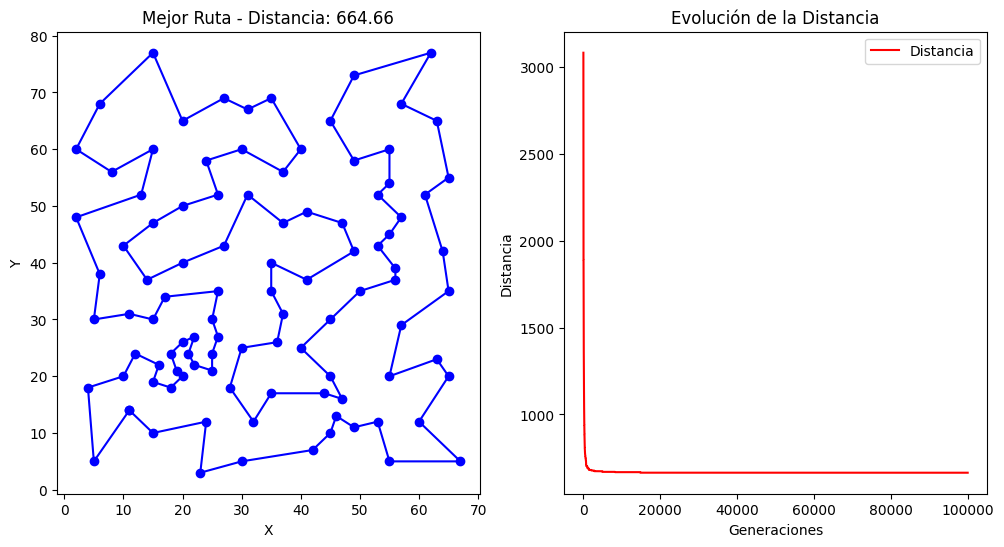

GIF guardado como tsp_berlin52.gif


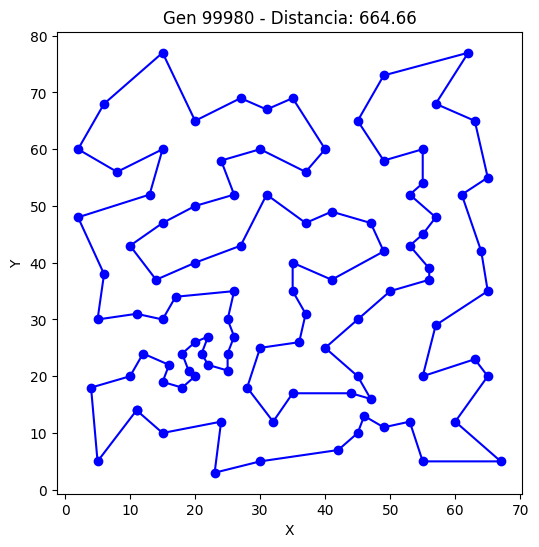

In [9]:
best_route, best_dist = genetic_algorithm(distance_table,
                                          N=300,
                                          maxIter=100000,
                                          p_survivors=0.2,
                                          p_crossover=0.7,
                                          p_mutation=0.1,
                                          visualize=True,
                                          save_gif=True,
                                          gif_name="tsp_berlin52.gif")

In [10]:
print("Mejor ruta encontrada:", best_route)
print("Distancia total:", best_dist)

Mejor ruta encontrada: [74, 55, 22, 66, 38, 24, 54, 3, 53, 23, 28, 33, 77, 78, 32, 80, 50, 8, 34, 70, 64, 65, 19, 29, 69, 0, 68, 26, 27, 49, 75, 76, 2, 67, 79, 11, 25, 39, 57, 52, 100, 88, 51, 17, 59, 82, 7, 81, 47, 6, 87, 30, 61, 9, 31, 89, 62, 10, 18, 63, 48, 35, 46, 45, 44, 16, 85, 15, 43, 37, 13, 42, 14, 41, 99, 90, 84, 60, 83, 4, 98, 95, 58, 92, 97, 36, 91, 96, 94, 93, 5, 12, 86, 56, 1, 72, 20, 71, 73, 21, 40]
Distancia total: 679.9810227188389


In [7]:
def load_nodes_from_tsp(path):
    with open(path, 'r') as f:
        lines = f.readlines()
    node_lines = []
    read = False
    for line in lines:
        line = line.strip()
        if line == "NODE_COORD_SECTION":
            read = True
            continue
        if line == "EOF":
            break
        if read:
            node_lines.append(line)
    return node_lines


In [8]:
import matplotlib.pyplot as plt

def plot_tour(tour, distance_table, title="Ruta óptima"):
    nodes = distance_table.nodes  # lista de (id, x, y)
    # Ojo: en TSPLIB los nodos empiezan en 1, en tu lista están indexados igual
    x = [nodes[i-1][1] for i in tour] + [nodes[tour[0]-1][1]]
    y = [nodes[i-1][2] for i in tour] + [nodes[tour[0]-1][2]]

    plt.figure(figsize=(8,8))
    plt.plot(x, y, 'bo-')
    for idx, (node_id, nx, ny) in enumerate(nodes):
        plt.text(nx, ny, str(node_id), fontsize=8, color="red")
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


In [9]:
def parse_tsplib_tour(path):
    tour = []
    with open(path, "r") as f:
        read = False
        for line in f:
            line = line.strip()
            if line == "TOUR_SECTION":
                read = True
                continue
            if line in ("-1", "EOF"):
                break
            if read and line:
                tour.append(int(line))
    return tour


In [10]:
tour = parse_tsplib_tour("../data/expected/eil101.opt.tour")

print("Nodos en el tour (primeros 10):", tour[:10])
print("Cantidad de nodos en tour:", len(tour))


Nodos en el tour (primeros 10): [1, 69, 27, 101, 53, 28, 26, 12, 80, 68]
Cantidad de nodos en tour: 101


In [11]:
def compute_tour_length(tour, distance_table: DistanceTable):
    total = 0.0
    for i in range(len(tour)):
        j = (i + 1) % len(tour)
        total += distance_table.get_distance_between_nodes(tour[i], tour[j])
    return total

In [12]:
best_dist = compute_tour_length(tour, distance_table)

print("Distancia óptima:", best_dist)

Distancia óptima: 642.3095357906022


In [13]:
import matplotlib.pyplot as plt

def plot_tour(tour, distance_table, title="Ruta"):
    nodes = distance_table.nodes
    x = [nodes[i-1][1] for i in tour] + [nodes[tour[0]-1][1]]
    y = [nodes[i-1][2] for i in tour] + [nodes[tour[0]-1][2]]

    plt.figure(figsize=(8,8))
    plt.plot(x, y, 'bo-')
    for node_id, nx, ny in nodes:
        plt.text(nx, ny, str(node_id), fontsize=7, color="red")
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


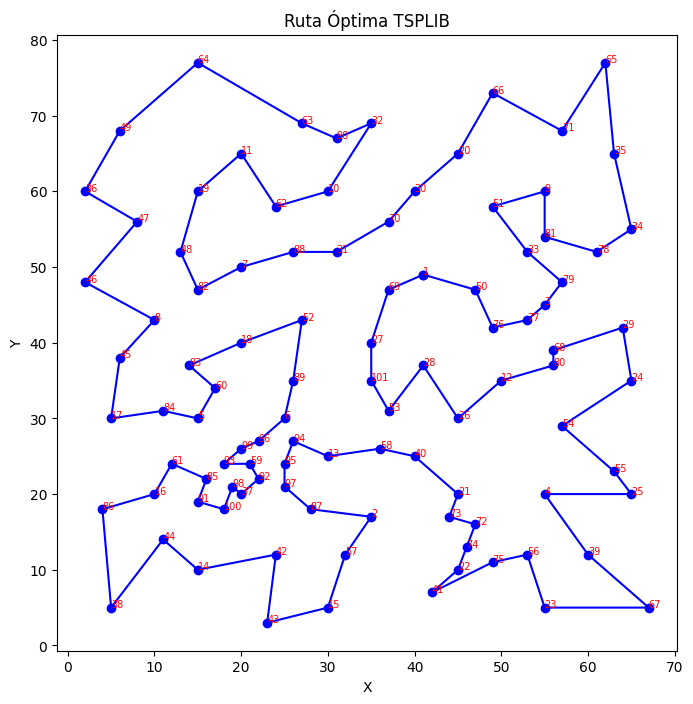

In [14]:
plot_tour(tour, distance_table, "Ruta Óptima TSPLIB")
